In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

tit = pd.read_csv("titanic.csv")
tit.info()
print(f"\nКоличество элементов: {tit.shape[0]}")
print(f"Количество признаков: {tit.shape[1]}\n")
print(tit.isnull().any())
tit.dropna()
tit["Age"] = tit["Age"].fillna(tit["Age"].mean())
print(tit.describe())
print(f"\nКоличество уникальных значений по признакам:{tit.nunique()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Количество элементов: 891
Количество признаков: 12

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fa

C:\Users\super\AppData\Local\Temp\ipykernel_12608\1676479313.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

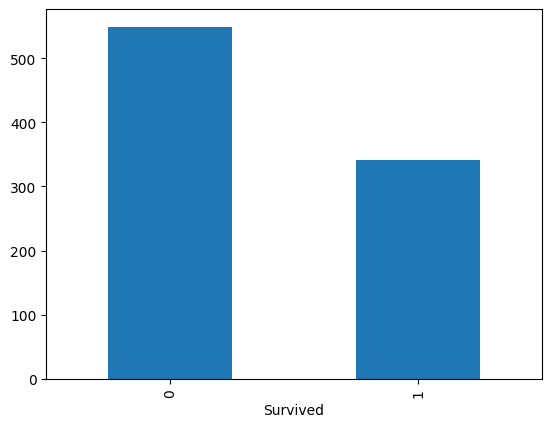

In [2]:
#1
survived = tit['Survived'].value_counts()
print(survived)
survived.plot(kind="bar")

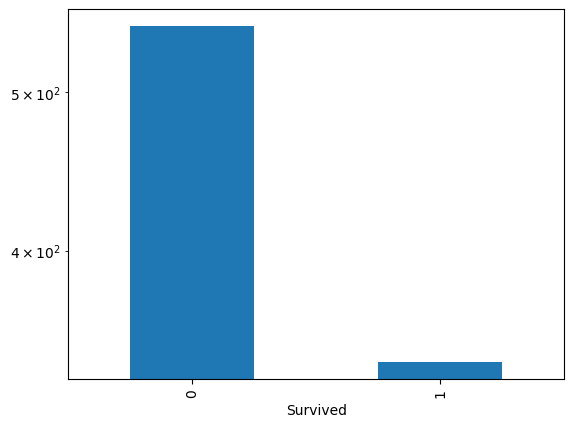

In [3]:
#2
survived.plot(kind="bar").set_yscale('log')

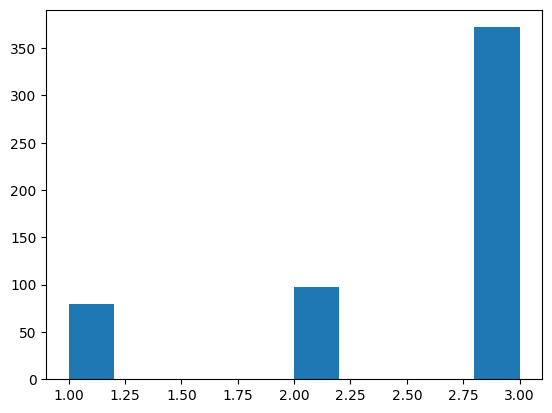

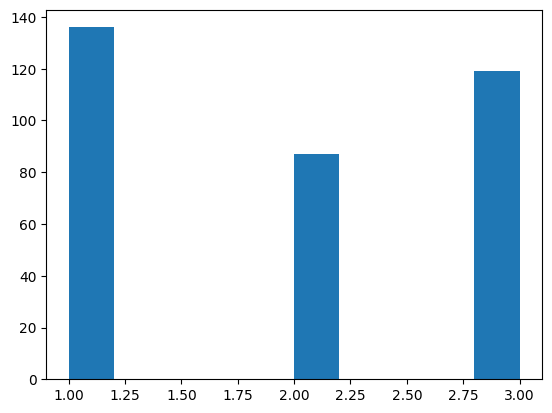

In [4]:
#3
plt.hist(tit[tit['Survived'] == 0].Pclass)
plt.show()
plt.hist(tit[tit['Survived'] == 1].Pclass)
plt.show()

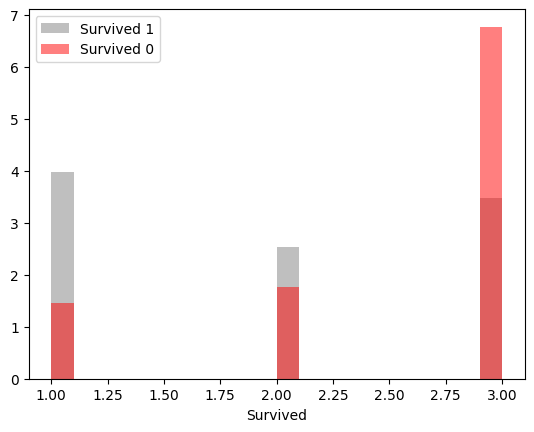

In [5]:
#4
plt.hist(tit[tit['Survived'] == 1].Pclass, density=True, bins=20, alpha=0.5, color='grey', label='Survived 1')
plt.hist(tit[tit['Survived'] == 0].Pclass,  density=True, bins=20, alpha=0.5, color='red',  label='Survived 0')
plt.xlabel('Survived')
plt.legend()
plt.show()

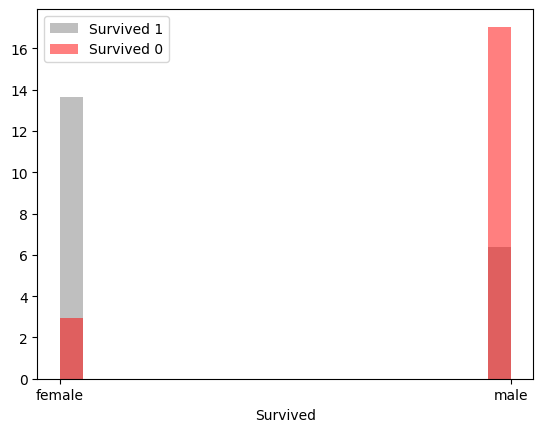

In [6]:
#5
plt.hist(tit[tit['Survived'] == 1].Sex, density=True, bins=20, alpha=0.5, color='grey', label='Survived 1')
plt.hist(tit[tit['Survived'] == 0].Sex,  density=True, bins=20, alpha=0.5, color='red',  label='Survived 0')
plt.xlabel('Survived')
plt.legend()
plt.show()

<Axes: xlabel='Pclass'>

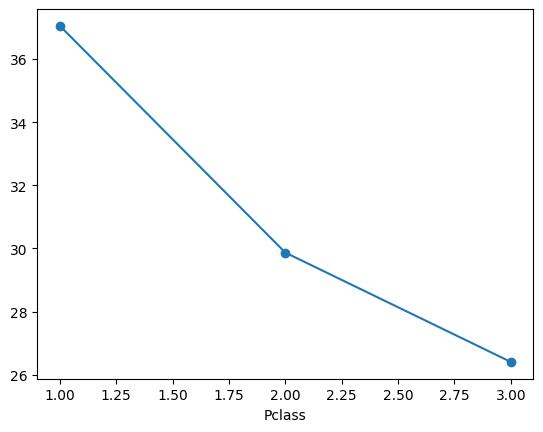

In [7]:
#6
tit.groupby('Pclass')['Age'].mean().plot(marker='o')

<Axes: >

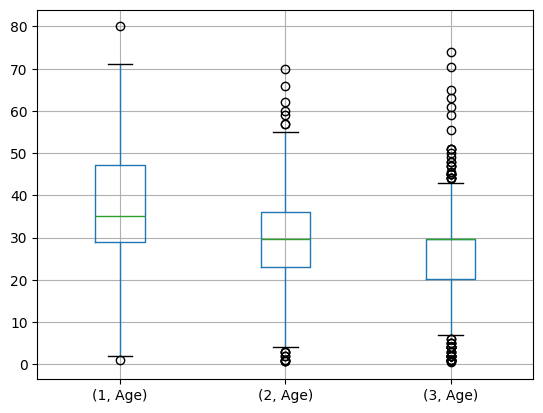

In [8]:
#7
tit.groupby('Pclass')[['Age']].boxplot(subplots=False)

C:\Users\super\AppData\Local\Temp\ipykernel_17384\2926826795.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_persent = tit.groupby('AgeGroup')['Survived'].mean() * 100.0


([<matplotlib.patches.Wedge at 0x2c0a2e5c790>,
 [Text(0.8913752703841848, 0.6445542082304027, '(0.34, 10.368]'),
  Text(-0.09312288666567377, 1.09605115208144, '(10.368, 20.315]'),
  Text(-0.8194936813543952, 0.7337779679305049, '(20.315, 30.263]'),
  Text(-1.0954030675605568, -0.10045954200036131, '(30.263, 40.21]'),
  Text(-0.6259562856219999, -0.9045323258404364, '(40.21, 50.158]'),
  Text(0.24653312313826142, -1.072017452840995, '(50.158, 60.105]'),
  Text(0.8622946395783238, -0.6829699514286766, '(60.105, 70.052]'),
  Text(1.0756308914411237, -0.23025678139323846, '(70.052, 80.0]')],
 [Text(0.48620469293682805, 0.3515750226711287, '19.9%'),
  Text(-0.05079430181764023, 0.5978460829535127, '12.8%'),
  Text(-0.4469965534660337, 0.40024252796209353, '11.2%'),
  Text(-0.5974925823057582, -0.054796113818378886, '14.9%'),
  Text(-0.34143070124836356, -0.493381268640238, '12.9%'),
  Text(0.13447261262086985, -0.5847367924587245, '13.6%'),
  Text(0.4703425306790856, -0.37252906441564176, 

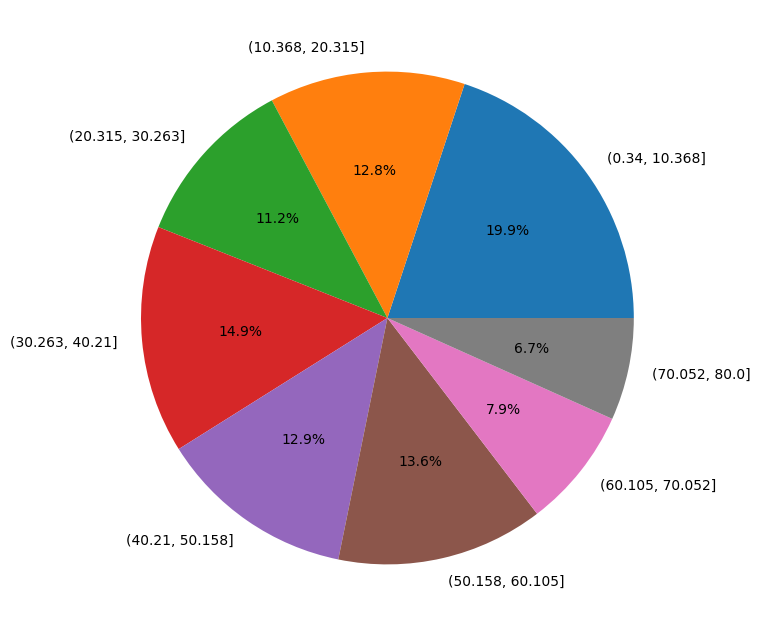

In [9]:
#8
plt.figure(figsize=(8, 8))
tit['AgeGroup'] = pd.cut(tit['Age'], 8)
survival_persent = tit.groupby('AgeGroup')['Survived'].mean() * 100.0
plt.pie(survival_persent, labels=survival_persent.index, autopct='%1.1f%%')


Text(0, 0.5, 'mean(Survived)')

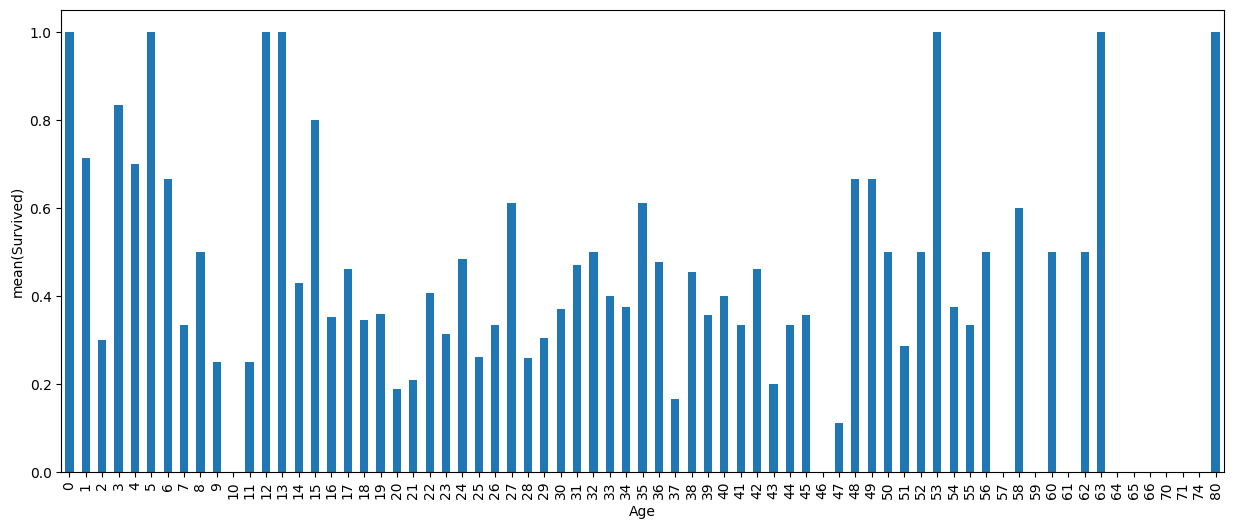

In [10]:
#9а
tit['AgeRounded'] = tit['Age'].astype(int)
plt.figure(figsize=(15, 6))
tit.groupby('AgeRounded')['Survived'].mean().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('mean(Survived)')

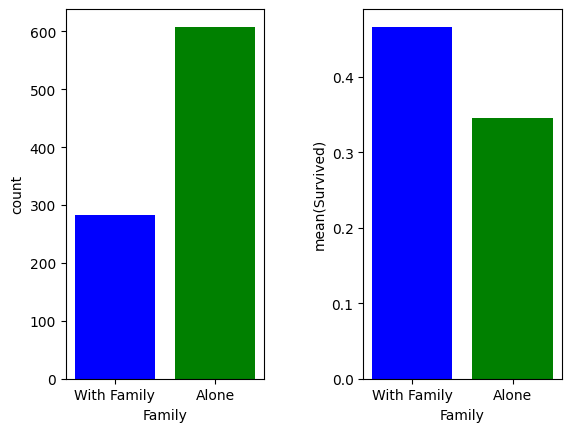

In [11]:
#9б
with_family = tit[tit['SibSp'] != 0]
alone = tit[tit['SibSp'] == 0]

y1=[with_family.count(), alone.count()]
y2=[with_family.Survived.mean(), alone.Survived.mean()]

fig, (ax, ax1) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
ax.bar('With Family',y1[0], color='blue')
ax.bar('Alone', y1[1], color='green')
ax.set_ylabel("count")
ax.set_xlabel("Family")

ax1.bar('With Family',y2[0], color='blue')
ax1.bar('Alone',y2[1], color='green')
ax1.set_ylabel("mean(Survived)")
ax1.set_xlabel("Family")
plt.show()